In [1]:
pip install tensorflow pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

In [4]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

In [5]:
data=pd.read_csv('dataset.csv')

In [6]:
x=data.iloc[:,:20].values
y=data.iloc[:,20:].values

In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [8]:
hidden_layer_neurons=60

In [9]:
model = Sequential()
model.add(Dense(hidden_layer_neurons, input_dim=x.shape[1], activation='tanh'))
model.add(Dense(y.shape[1], activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [10]:
history = model.fit(x, y, epochs=1500, batch_size=5, validation_split=0.1)

Epoch 1/1500
2/2 [==============================] - 1s 207ms/step - loss: 4.9385 - mae: 1.6476 - val_loss: 15.6415 - val_mae: 3.0992
Epoch 2/1500
2/2 [==============================] - 0s 88ms/step - loss: 4.8988 - mae: 1.6386 - val_loss: 15.6415 - val_mae: 3.0962
Epoch 3/1500
2/2 [==============================] - 0s 92ms/step - loss: 4.8632 - mae: 1.6297 - val_loss: 15.6339 - val_mae: 3.0919
Epoch 4/1500
2/2 [==============================] - 0s 91ms/step - loss: 4.8302 - mae: 1.6210 - val_loss: 15.6467 - val_mae: 3.0904
Epoch 5/1500
2/2 [==============================] - 0s 94ms/step - loss: 4.7928 - mae: 1.6115 - val_loss: 15.6271 - val_mae: 3.0847
Epoch 6/1500
2/2 [==============================] - 0s 95ms/step - loss: 4.7588 - mae: 1.6031 - val_loss: 15.5864 - val_mae: 3.0767
Epoch 7/1500
2/2 [==============================] - 0s 88ms/step - loss: 4.7233 - mae: 1.5948 - val_loss: 15.5597 - val_mae: 3.0701
Epoch 8/1500
2/2 [==============================] - 0s 91ms/step - loss: 4.

In [11]:
loss, mae = model.evaluate(x, y)
print(f"Test Loss: {loss}, Test MAE: {mae}")

1/1 [==============================] - 0s 91ms/step - loss: 0.1203 - mae: 0.1697
Test Loss: 0.12031573057174683, Test MAE: 0.1696689873933792


In [14]:
predictions = model.predict(x)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

1/1 [==============================] - 0s 142ms/step
RMSE: 0.3468655736023869


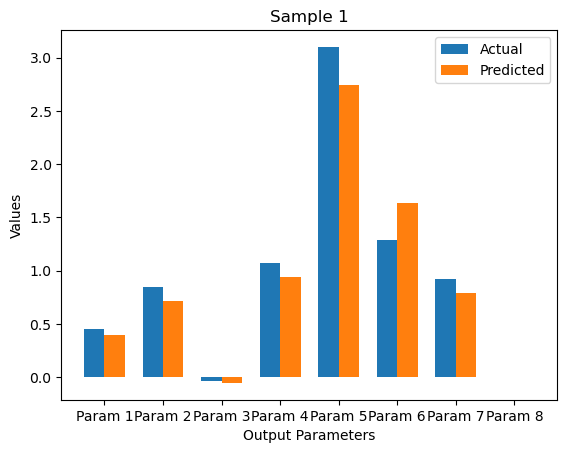

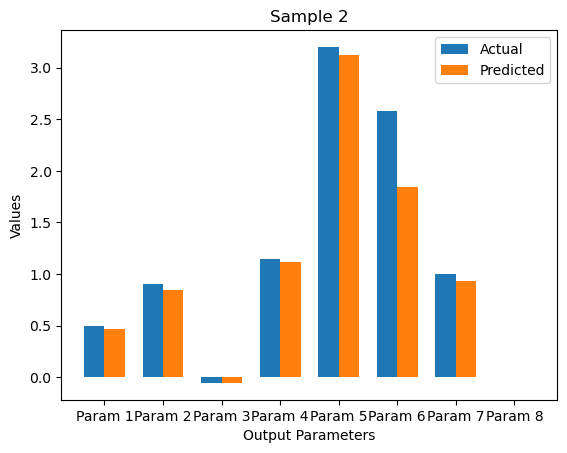

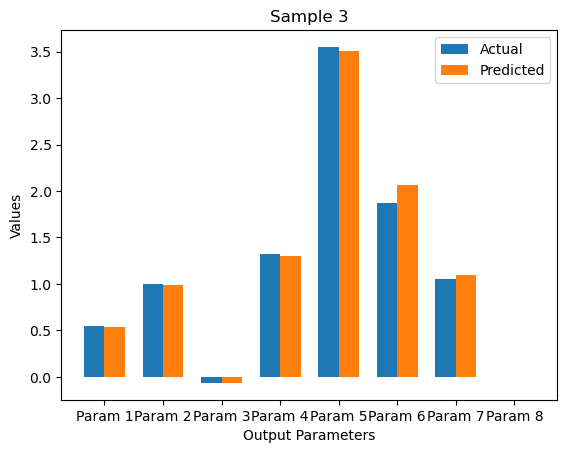

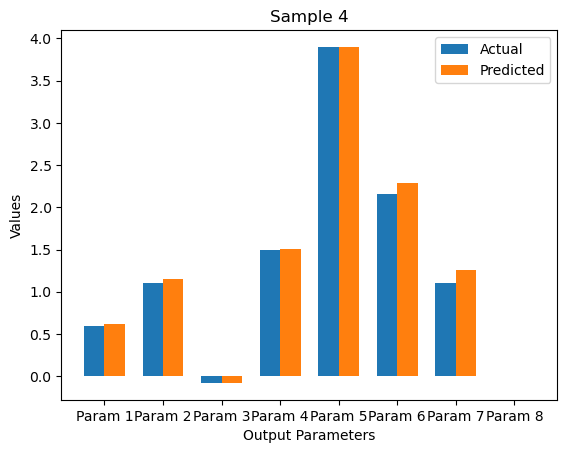

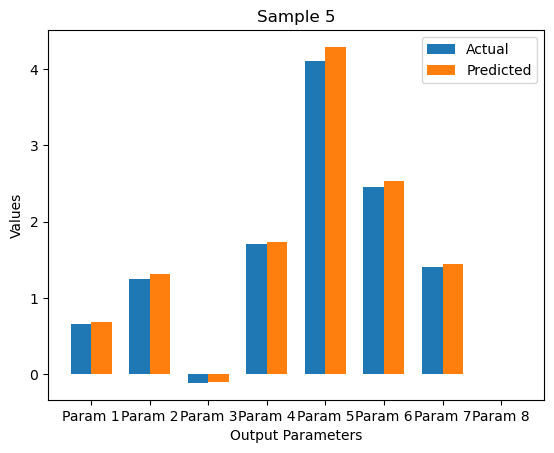

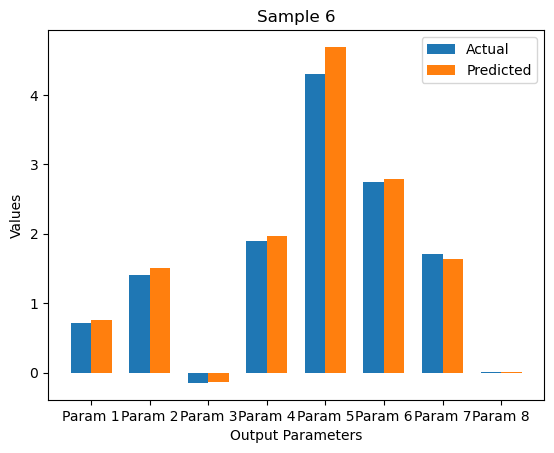

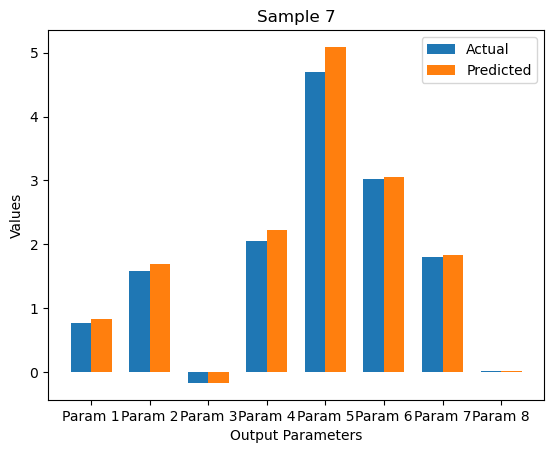

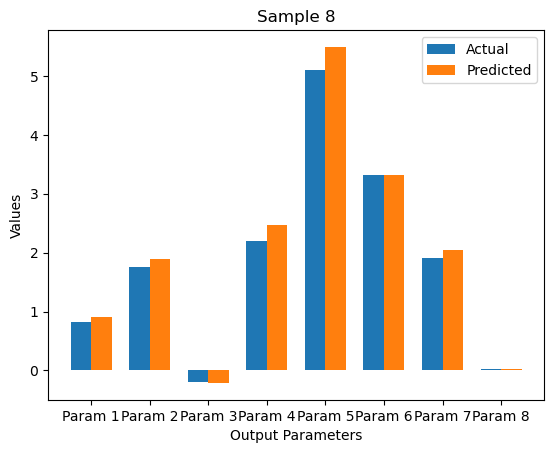

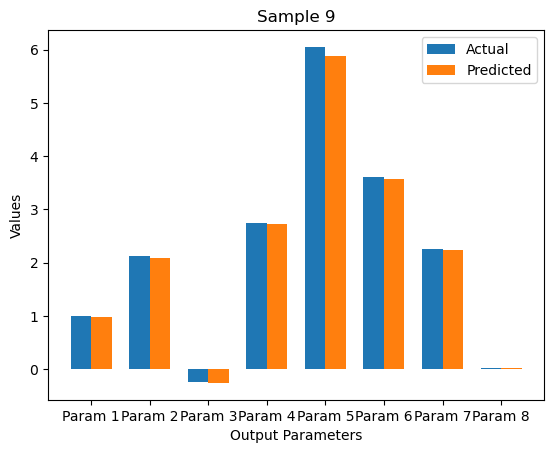

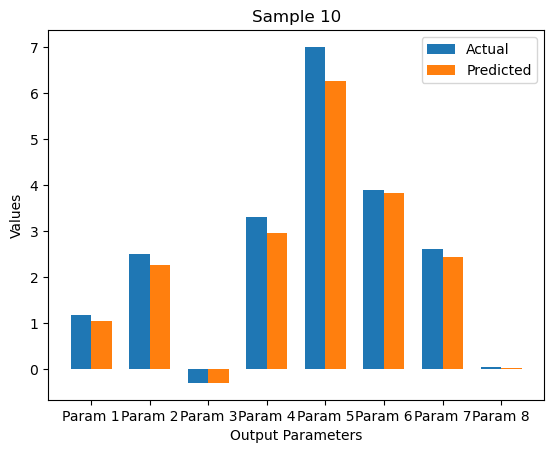

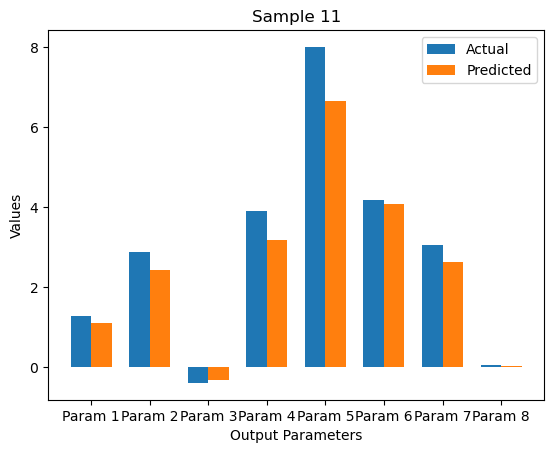

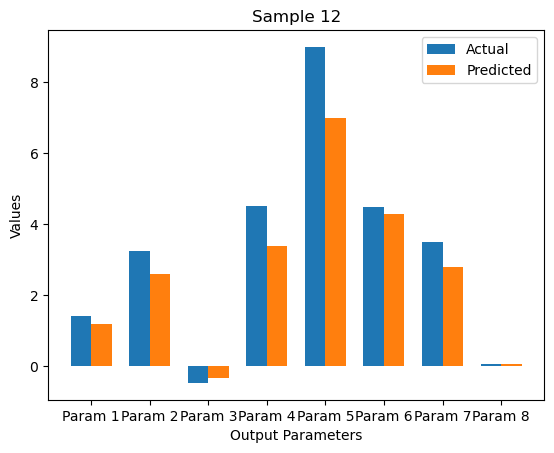

In [15]:
num_samples = y.shape[0]
num_parameters = y.shape[1]
for i in range(num_samples):
    plt.figure()
    indices = np.arange(num_parameters)
    width = 0.35
    
    plt.bar(indices - width/2, y[i], width, label='Actual')
    plt.bar(indices + width/2, predictions[i], width, label='Predicted')
    
    plt.xlabel('Output Parameters')
    plt.ylabel('Values')
    plt.title(f'Sample {i+1}')
    plt.xticks(indices, [f'Param {j+1}' for j in range(num_parameters)])
    plt.legend()
    plt.show()